# Introduction
I'm interested in learning how to classify which group a future survey respondent might belong to given two possible outcomes. Given this, the project will explore ML techniques that enable binary classifications.

*Types of Relevant Research Questions in the future that can utilize this ML approach/ code:*
* *Is a site vulernable to flooding?*
* *Is a neighborhood gentrifying?*
* *Is this area a high risk zone for heat?*
* *Is this water system sufficient for future population growth?*
* *Who are they likely to vote for?*
* *Will the user leave the app?*

I will not be analyzing the data to create multi-class outcome (i.e. Answering "what type of persona or archetype is this user? class#>2 ) with this model - it will require more code changes and model changes.

### Predicting Divorce based on Divorce Predictor Scale (DPS) survey
For this project, I will be working with survey data sourced from UC Irvine's ML repository to predict whether or not a survey respondent is likely to get a Divorce based on their answers.

The DPS survey, based on Gottman couples therapy, had 170 respondents, and of the participants, 84 (49%) were divorced and 86 (51%) were married couples. The data was donated to UCI on 7/23/19.



### Variable Information

1.	When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my wife from the beginning and correct it.
4.	When I argue with my wife, it will eventually work for me to contact him.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	My wife and most of our goals are common.
11.	I think that one day in the future, when I look back, I see that my wife and I are in harmony with each other.
12.	My wife and I have similar values in terms of personal freedom.
13.	My husband and I have similar entertainment.
14.	Most of our goals for people (children, friends, etc.) are the same.
15.	Our dreams of living with my wife are similar and harmonious
16.	We're compatible with my wife about what love should be
17.	We share the same views with my wife about being happy in your life
18.	My wife and I have similar ideas about how marriage should be
19.	My wife and I have similar ideas about how roles should be in marriage
20.	My wife and I have similar values in trust
21.	I know exactly what my wife likes.
22.	I know how my wife wants to be taken care of when she's sick.
23.	I know my wife's favorite food.
24.	I can tell you what kind of stress my wife is facing in her life.
25.	I have knowledge of my wife's inner world.
26.	I know my wife's basic concerns.
27.	I know what my wife's current sources of stress are.
28.	I know my wife's hopes and wishes.
29.	I know my wife very well.
30.	I know my wife's friends and their social relationships.
31.	I feel aggressive when I argue with my wife.
32.	When discussing with my wife, I usually use expressions such as â€œyou alwaysâ€œ or â€œyou neverâ€.
33.	I can use negative statements about my wife's personality during our discussions.
34.	I can use offensive expressions during our discussions.
35.	I can insult our discussions.
36.	I can be humiliating when we argue.
37.	My argument with my wife is not calm.
38.	I hate my wife's way of bringing it up.
39.	Fights often occur suddenly.
40.	We're just starting a fight before I know what's going on.
41.	When I talk to my wife about something, my calm suddenly breaks.
42.	When I argue with my wife, it only snaps in and I don't say a word.
43.	I'm mostly thirsty to calm the environment a little bit.
44.	Sometimes I think it's good for me to leave home for a while.
45.	I'd rather stay silent than argue with my wife.
46.	Even if I'm right in the argument, I'm thirsty not to upset the other side.
47.	When I argue with my wife, I remain silent because I am afraid of not being able to control my anger.
48.	I feel right in our discussions.
49.	I have nothing to do with what I've been accused of.
50.	I'm not actually the one who's guilty about what I'm accused of.
51.	I'm not the one who's wrong about problems at home.
52.	I wouldn't hesitate to tell her about my wife's inadequacy.
53.	When I discuss it, I remind her of my wife's inadequate issues.
54.	I'm not afraid to tell her about my wife's incompetence.

# Pre-processing Data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# to load the dataset from Google Drive, uncomment the below 3 lines and check the file path:
# see the assignment instructions on BruinLearn for help!

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/Colab_Notebooks/divorce.xlsx'
#############################################################################################

#filepath = 'divorce.xlsx'


#we will use the pandas library to load the .csv file as a dataframe object:
data = pd.read_excel(filepath)

#pandas is a library to organize data into DataFrame objects, which have lots of useful methods
# it allows us to process our data more efficiently

pd.set_option('display.max_columns', None)
data.head(5) #print the top n rows of the dataframe

Mounted at /content/drive


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [154]:
# Check if any NaN or null values exist
has_nan = data.isnull().values.any()

print("Are there any NaN values?", has_nan)

# Count unique values in the "Class" column to see if Class is already organized as Binary
class_counts = data['Class'].value_counts()

print("Count of unique values in 'Class':")
print(class_counts)

response_type_counts = data['Atr1'].value_counts()

print("Count of unique values in 'Atr1':")
print(response_type_counts)

Are there any NaN values? False
Count of unique values in 'Class':
Class
0    86
1    84
Name: count, dtype: int64
Count of unique values in 'Atr1':
Atr1
0    69
3    47
4    31
2    14
1     9
Name: count, dtype: int64


In [155]:
data_clean = data # creating a new data frame to preserve the original for reference
data_clean.head(5)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


## Check for Linear Relationship

Will do this through conducting a correlation analysis on the original data frame 'data'.

In [7]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame with columns 'Atr 1', 'Atr 2', ..., 'Atr 54', and 'Class'

# Calculate Spearman's rank correlation for each feature with the outcome (Class)
spearman_results = {}
for feature in data.columns[:-1]:  # Excluding the 'Class' column
    corr, p_value = spearmanr(data[feature], data['Class'])
    spearman_results[feature] = (corr, p_value)

# Display results
spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index', columns=['Spearman Correlation', 'P-value'])
print(spearman_df)

       Spearman Correlation       P-value
Atr1               0.838099  4.449152e-46
Atr2               0.812226  3.571205e-41
Atr3               0.802226  1.775022e-39
Atr4               0.824734  1.916183e-43
Atr5               0.886991  2.925616e-58
Atr6               0.469227  1.087578e-10
Atr7               0.675776  5.022878e-24
Atr8               0.866700  1.275989e-52
Atr9               0.900414  1.274997e-62
Atr10              0.833350  4.082073e-45
Atr11              0.881634  1.134428e-56
Atr12              0.852679  3.063762e-49
Atr13              0.828045  4.478435e-44
Atr14              0.849221  1.846452e-48
Atr15              0.885275  9.631259e-58
Atr16              0.881268  1.446236e-56
Atr17              0.900228  1.479628e-62
Atr18              0.909384  6.757340e-66
Atr19              0.897650  1.128758e-61
Atr20              0.909293  7.319949e-66
Atr21              0.853221  2.303101e-49
Atr22              0.846948  5.866322e-48
Atr23              0.835938  1.230

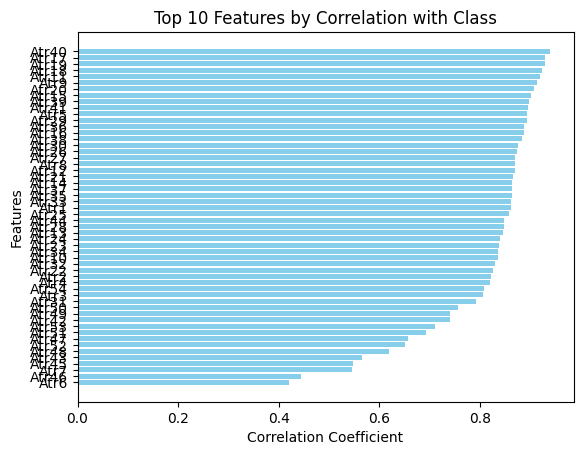

In [6]:
import matplotlib.pyplot as plt

# Plot top 10 features with highest absolute correlations
top_features = correlation_df.nlargest(54, 'AbsCorrelation')

plt.barh(top_features['Feature'], top_features['Correlation'], color='skyblue')
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Top 10 Features by Correlation with Class")
plt.gca().invert_yaxis()
plt.show()

## Checking Multicollinearity with VIF


VIF (Variance Inflation Factor) is a measure used to detect multicollinearity in multiple linear regression models. It quantifies how much the variance of a regression coefficient is inflated due to the presence of collinearity among the independent variables. A high VIF value indicates that a predictor variable is highly correlated with other variables, making it difficult to isolate its effect on the dependent variable.

VIF Interpretation:
VIF = 1: No correlation between the predictor and other variables.
1 < VIF < 5: Moderate correlation; usually acceptable.
VIF > 5: High correlation, indicating potential multicollinearity.
VIF > 10: Strong multicollinearity; a warning sign that the variable may need to be removed or addressed.

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'x' is your feature DataFrame
# Add a constant column to your feature matrix (intercept term)
x_with_const = add_constant(data_clean)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(x_with_const.values, i)
                   for i in range(x_with_const.shape[1])]

# Display the VIF data
print(vif_data)

   Feature        VIF
0    const  32.688620
1     Atr1  14.506823
2     Atr2  11.067017
3     Atr3   9.730736
4     Atr4  16.342140
5     Atr5  31.312606
6     Atr6   3.517251
7     Atr7   5.185230
8     Atr8  26.810156
9     Atr9  40.325915
10   Atr10  14.781353
11   Atr11  36.882366
12   Atr12  25.586398
13   Atr13  14.815371
14   Atr14  19.979402
15   Atr15  26.938977
16   Atr16  27.605218
17   Atr17  56.318160
18   Atr18  68.452915
19   Atr19  44.118622
20   Atr20  47.957290
21   Atr21  35.777315
22   Atr22  32.182069
23   Atr23  32.042130
24   Atr24  15.768755
25   Atr25  31.358762
26   Atr26  35.267447
27   Atr27  26.008114
28   Atr28  29.429221
29   Atr29  52.488440
30   Atr30  27.904048
31   Atr31  10.020888
32   Atr32  11.680647
33   Atr33  30.406416
34   Atr34  19.314451
35   Atr35  38.161449
36   Atr36  49.799439
37   Atr37  14.726028
38   Atr38  22.668146
39   Atr39  20.191865
40   Atr40  40.404350
41   Atr41  18.690747
42   Atr42   6.639765
43   Atr43   5.340522
44   Atr44

# Model 1 & 2 Assignments
Run the code below with either to see the different results.


**Model 1:** Removes highly correlated variables and runs ridge regression with CFS, resulting in 16 variables/features/ survey questions retained in the data frame for a Ridge Logistic Regression


**Model 2:** All 54 variables, with Lasso Logistic Regression to address multicollinearity

## Correlation Based Feature Selection Data Set
Removing Multicollinearity Features

In [159]:
# Specify the target variable (e.g., 'Class') and feature set
target_variable = 'Class'  # Adjust this to match your dataset
features = data.drop(columns=[target_variable])  # Features
target = data[target_variable]  # Target variable

# Calculate correlation matrix
correlation_matrix = features.corr()

# Correlation of each feature with the target variable
feature_target_correlation = features.corrwith(target)

# Set a threshold for feature-to-target relevance
target_correlation_threshold = 0.2  # Adjust based on your data

# Select features highly correlated with the target
relevant_features = feature_target_correlation[abs(feature_target_correlation) > target_correlation_threshold].index

# Filter out redundant features by setting a feature-to-feature correlation threshold
feature_correlation_threshold = 0.8  # Adjust based on your data

# Initialize a list to store selected features
selected_features = []

# Check each relevant feature for redundancy
for feature in relevant_features:
    if not selected_features:  # Always add the first feature
        selected_features.append(feature)
    else:
        # Check correlation with already selected features
        is_redundant = any(abs(correlation_matrix[feature][selected]) > feature_correlation_threshold
                           for selected in selected_features)
        if not is_redundant:
            selected_features.append(feature)

# Create a new dataset with only the selected features
filtered_data = data[selected_features + [target_variable]]

# Print results
print(f"Selected Features: {selected_features}")
print(f"Filtered Data Shape: {filtered_data.shape}")

# Save the filtered dataset (optional)
#filtered_data.to_csv('filtered_data.csv', index=False)



Selected Features: ['Atr1', 'Atr6', 'Atr7', 'Atr10', 'Atr31', 'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr51', 'Atr52', 'Atr54']
Filtered Data Shape: (170, 17)


In [160]:
# MODEL 1: REMOVED HIGHLY CORRELATED FEATURES / VARIABLES
# using filtered_data

# Running new VIF on this to see if there any multicollinearity issues again

# Assuming 'x' is your feature DataFrame
# Add a constant column to your feature matrix (intercept term)
x_with_const = add_constant(filtered_data)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(x_with_const.values, i)
                   for i in range(x_with_const.shape[1])]

# Display the VIF data
print(vif_data)

   Feature        VIF
0    const  14.118422
1     Atr1   5.008020
2     Atr6   1.482717
3     Atr7   1.831576
4    Atr10   4.071288
5    Atr31   3.529960
6    Atr42   3.945097
7    Atr43   3.543854
8    Atr44   5.014597
9    Atr45   3.520224
10   Atr46   2.435296
11   Atr47   3.835519
12   Atr48   2.542322
13   Atr49   3.212621
14   Atr51   3.529661
15   Atr52   3.043692
16   Atr54   5.797496
17   Class  11.461377


# Model 1 CFS + Ridge Logistic Regression



## 1. Get train and test data

In [161]:
#isolate target y as the Class column values:
y = filtered_data.Class.values
#isolate features xi as every other column:
x_data = filtered_data.drop('Class', axis=1)
x_data.head()


,Atr1,Atr6,Atr7,Atr10,Atr31,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr51,Atr52,Atr54
0,2,0,0,0,1,1,1,2,3,2,1,3,3,2,3,1
1,4,0,0,4,0,2,3,4,2,2,2,3,4,4,4,2
2,2,3,2,2,3,3,2,3,2,3,2,3,1,1,2,2
3,3,3,3,3,2,2,3,2,3,2,2,3,3,3,2,2
4,2,1,0,0,1,2,3,0,2,2,1,2,3,2,2,0


In [104]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 2. Converting the data frame into 0 to 1 to normalize the data

Given that the data sample size is smaller and the values are also small, normalization isn't strictly necessary in this circumstance. We'll still normalize it to future proof the code a little.

In [162]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(x_data)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the data (assuming all columns are features)
normalized_data = scaler.fit_transform(x)

# Convert back to DataFrame for easier viewing
normalized_x = pd.DataFrame(normalized_data, columns=x.columns)

x = normalized_x # re-assign normalized x values to x dataframe

print("Normalized Data:")
x.head(5)



Normalized Data:


,Atr1,Atr6,Atr7,Atr10,Atr31,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr51,Atr52,Atr54
0,0.50,0.00,0.00,0.00,0.25,0.25,0.25,0.50,0.75,0.50,0.25,0.75,0.75,0.50,0.75,0.25
1,1.00,0.00,0.00,1.00,0.00,0.50,0.75,1.00,0.50,0.50,0.50,0.75,1.00,1.00,1.00,0.50
2,0.50,0.75,0.50,0.50,0.75,0.75,0.50,0.75,0.50,0.75,0.50,0.75,0.25,0.25,0.50,0.50
3,0.75,0.75,0.75,0.75,0.50,0.50,0.75,0.50,0.75,0.50,0.50,0.75,0.75,0.75,0.50,0.50
4,0.50,0.25,0.00,0.00,0.25,0.50,0.75,0.00,0.50,0.50,0.25,0.50,0.75,0.50,0.50,0.00


## 3. Split the Training & Test Set

In [163]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)
print("x training data shape:")
print("",x_train.shape)
print("y training data shape:")
print("",y_train.shape)
print("x testing data shape:")
print("",x_test.shape)
print("y testing data shape:")
print("",y_test.shape)

x training data shape:
 (136, 16)
y training data shape:
 (136,)
x testing data shape:
 (34, 16)
y testing data shape:
 (34,)


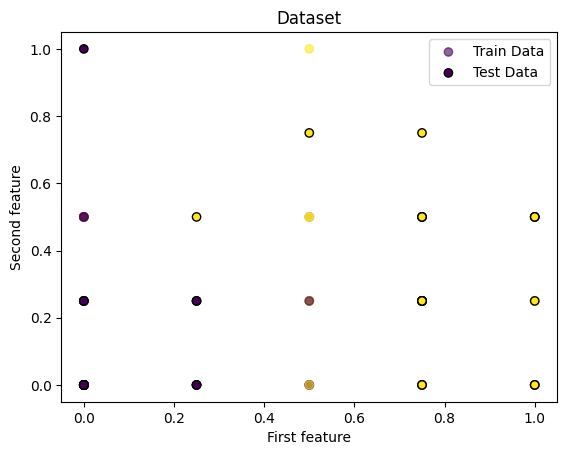

'\n#plot the normalized data:\nfig, ax = plt.subplots() #create a figure and axis object\nax.scatter(x_train[:,0], x_train[:,1], c=y_train)\nax.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolor=\'black\')\nplt.title("Dataset")\nplt.xlabel("First feature")\nplt.ylabel("Second feature")\nplt.show()\n'

In [164]:
#  using pandas instead of numpy to plot the data

# Plot the normalized data
fig, ax = plt.subplots()  # Create a figure and axis object

# If x_train and x_test are pandas DataFrames, use .iloc or .values for indexing
ax.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, label='Train Data', alpha=0.6)
ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, edgecolor='black', label='Test Data')

plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()
plt.show()

#numpy code:
'''
#plot the normalized data:
fig, ax = plt.subplots() #create a figure and axis object
ax.scatter(x_train[:,0], x_train[:,1], c=y_train)
ax.scatter(x_test[:,0], x_test[:,1], c=y_test, edgecolor='black')
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
'''

## 4. Run the Regression

The cost function is already included here as part of the model training process from LogisticRegression / scikit. Specifically, the fit() method uses the cost function (log loss for logistic regression) to evaluate the error between the predicted probabilities and the actual y_train labels. That means gradient descent is also covered.

In [1]:
from sklearn.linear_model import LogisticRegression

#instantiate the LogisticRegression model:
# Set regularization strength (smaller C = stronger regularization)
lr = LogisticRegression(max_iter=2000, C = 0.01, penalty='l2')   # Default is C=1. Adjust as needed.

#train it:
lr.fit(x_train, y_train)

#calculate the score when predicting the test data:

test_accuracy = lr.score(x_test, y_test)
print("Accuracy of the model on test data:", test_accuracy)

# Calculate training accuracy
train_accuracy = lr.score(x_train, y_train)  # Using the model's score method
print(f"Training Accuracy: {train_accuracy:.4f}")

print("Feature Coefficients:", lr.coef_)

###############################

NameError: name 'x_train' is not defined

## Creating a ROC curve

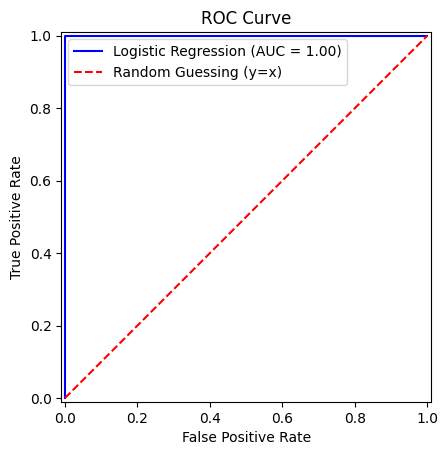

In [169]:
from sklearn.metrics import RocCurveDisplay

###############################
# Calculate the probabilities of the positive class
y_prob = lr.predict_proba(x_test)[:, 1]  # Get the probability of the positive class

# Your code starts here
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob, name='Logistic Regression', color='blue')

# Superpose the diagonal line (y=x)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (y=x)')

# Set plot title and labels
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show legend
plt.legend(loc='best')

# Display the plot
plt.show()

###############################

## Cross Validation

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Create a stratified cross-validator
stratified_cv = StratifiedKFold(n_splits=5)

# Perform cross-validation
cv_scores = cross_val_score(lr, x, y, cv=stratified_cv, scoring='accuracy')

print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores for each fold: [0.82352941 1.         1.         1.         1.        ]
Mean cross-validation score: 0.9647058823529411
Standard deviation of cross-validation scores: 0.07058823529411767


## Running a Classification Report

In [172]:
from sklearn.metrics import classification_report

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.90      0.95        20

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34



## Creating a Confusion Matrix

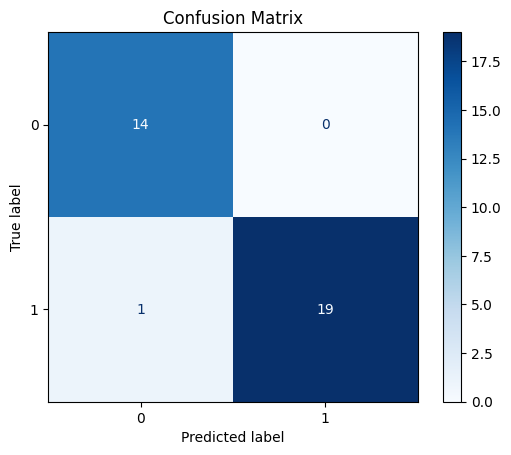

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

###############################
# Your code starts here

y_pred = lr.predict(x_test) #to compare with y_test...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues, values_format='d')  # Use a blue color map and format values as integers
plt.title("Confusion Matrix")
plt.show()


##Coefficient Analysis for Logistic Regression

Understanding which variables contributed the most to the model.

#### Understanding Coefficients in Normalized Data
When you normalize data to a range of 0 to 1, each coefficient in your logistic regression model represents the change in the log-odds of the outcome (e.g., getting divorced) for a unit change in that feature. The coefficients tell you which variables have a higher influence on the prediction, but to understand whether a higher or lower response contributes more to a higher prediction, consider the following:

* Positive Coefficient: If a coefficient for a variable is positive, it means that as the survey response (after normalization) increases, the likelihood of predicting the positive class (e.g., getting divorced) also increases. This indicates that higher normalized responses for this variable are associated with a higher chance of divorce.
* Negative Coefficient: If the coefficient is negative, it implies that as the survey response increases, the likelihood of predicting the positive class decreases. This suggests that higher normalized responses for this variable are associated with a lower chance of divorce.

In [200]:
import pandas as pd

# Get the coefficients from the Logistic Regression model
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

   Feature  Coefficient
0     Atr1     0.691064
3    Atr10     0.605483
7    Atr44     0.597083
4    Atr31     0.585415
15   Atr54     0.521932
12   Atr49     0.496428
5    Atr42     0.460331
14   Atr52     0.371470
10   Atr47     0.324628
13   Atr51     0.299553
2     Atr7     0.291875
1     Atr6     0.267584
6    Atr43     0.233162
11   Atr48     0.208610
8    Atr45     0.180501
9    Atr46     0.055040


## CFS + Ridge Logistic Regression

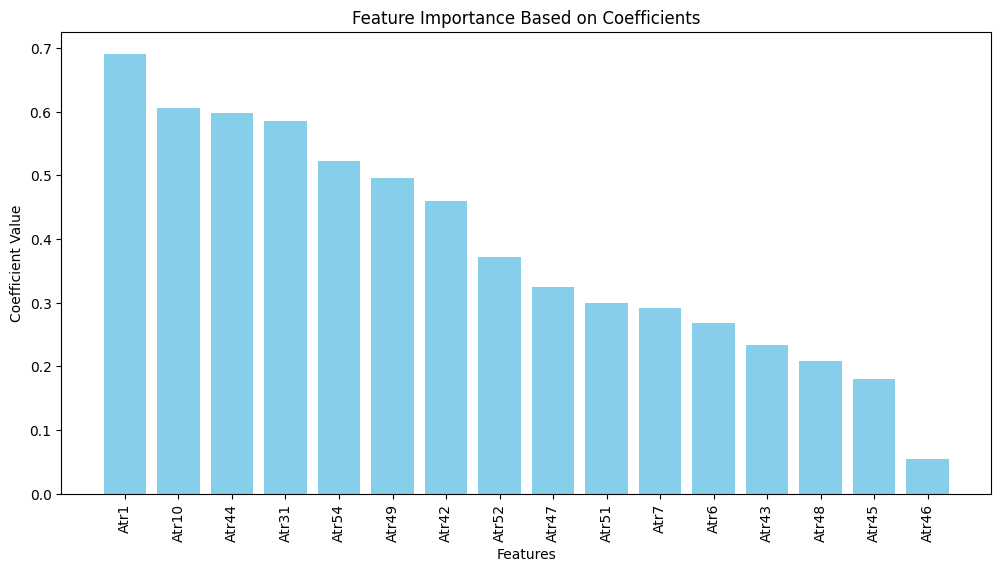

In [175]:
# Get the model coefficients
coefficients = lr.coef_[0]
features = x_train.columns

# Create a DataFrame for plotting
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

## Correlations with CFS smaller sample

In [177]:
# Display the correlation matrix with formatted output
correlation_matrix = filtered_data.corr()
print("Feature Correlation Matrix:")
print(correlation_matrix.style.format("{:.2f}"))  # Format numbers to 2 decimal places

threshold = 0.7  # Adjust as needed
strong_correlations = correlation_matrix[correlation_matrix.abs() > threshold]
print("Strong Correlations (above threshold):")
print(strong_correlations)

Feature Correlation Matrix:
Strong Correlations (above threshold):
           Atr1  Atr6  Atr7     Atr10     Atr31     Atr42     Atr43     Atr44  \
Atr1   1.000000   NaN   NaN  0.790183       NaN       NaN       NaN  0.752972   
Atr6        NaN   1.0   NaN       NaN       NaN       NaN       NaN       NaN   
Atr7        NaN   NaN   1.0       NaN       NaN       NaN       NaN       NaN   
Atr10  0.790183   NaN   NaN  1.000000  0.704880       NaN       NaN  0.723545   
Atr31       NaN   NaN   NaN  0.704880  1.000000       NaN       NaN  0.719372   
Atr42       NaN   NaN   NaN       NaN       NaN  1.000000  0.719095  0.706615   
Atr43       NaN   NaN   NaN       NaN       NaN  0.719095  1.000000       NaN   
Atr44  0.752972   NaN   NaN  0.723545  0.719372  0.706615       NaN  1.000000   
Atr45       NaN   NaN   NaN       NaN       NaN       NaN  0.775103       NaN   
Atr46       NaN   NaN   NaN       NaN       NaN       NaN       NaN       NaN   
Atr47       NaN   NaN   NaN       NaN     

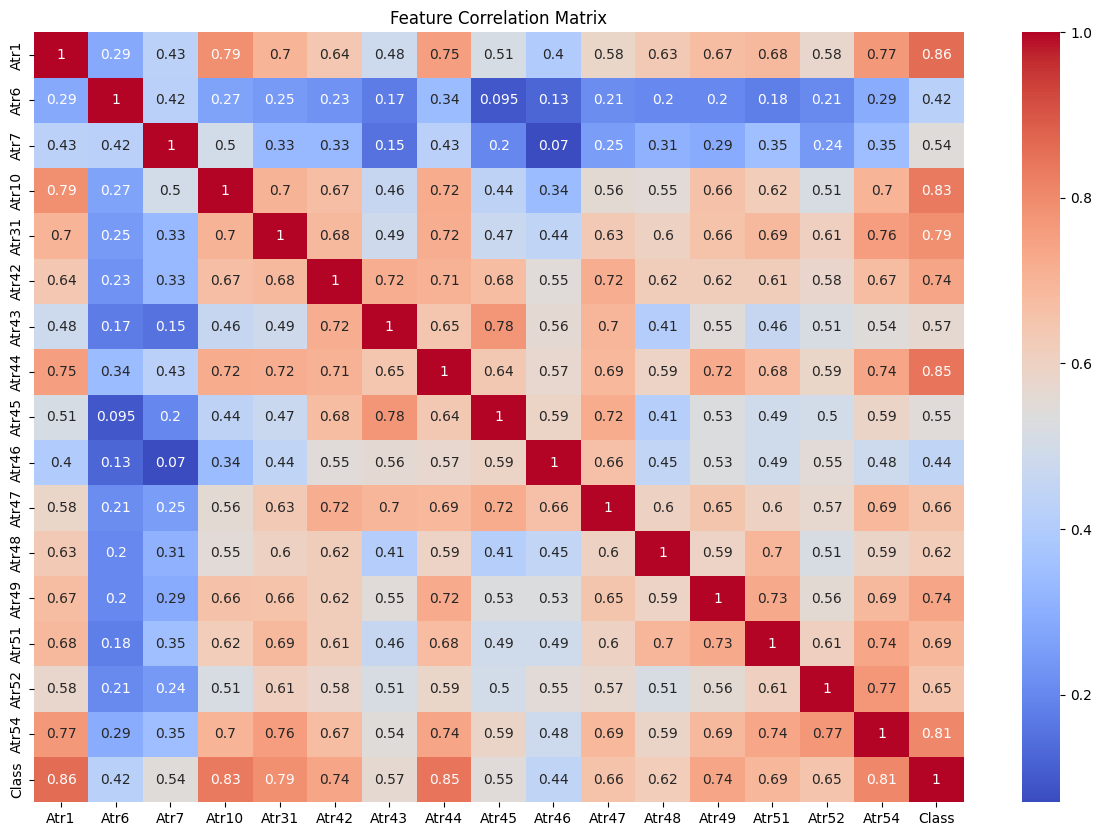

In [178]:
import seaborn as sns

correlation_matrix = filtered_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Model 2: Lasso Logistic Regression


In [179]:
# MODEL 2: RETAINS ALL FEATURES/ VARIABLES (default)

data_clean = data

In [183]:
#isolate target y as the Class column values:
y2 = data_clean.Class.values
#isolate features xi as every other column:
x2_data = data_clean.drop('Class', axis=1)
x2_data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0


### Normalization

In [185]:
from sklearn.preprocessing import MinMaxScaler

x2 = pd.DataFrame(x2_data)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the data (assuming all columns are features)
normalized_data = scaler.fit_transform(x2)

# Convert back to DataFrame for easier viewing
normalized_x = pd.DataFrame(normalized_data, columns=x2.columns)

x2 = normalized_x # re-assign normalized x values to x dataframe

print("Normalized Data:")
x2.head(5)



Normalized Data:


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,0.50,0.5,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.50,0.00,0.25,0.50,0.25,0.75,0.75,0.50,0.25,0.25,0.50,0.75,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25
1,1.00,1.0,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.75,1.00,0.00,1.00,1.00,1.00,1.00,0.75,0.50,0.25,0.25,0.00,0.50,0.5,0.25,0.50,0.00,0.25,0.25,0.00,1.00,0.50,0.75,0.00,0.50,0.75,1.00,0.50,1.00,0.50,0.50,0.75,1.00,0.50,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50
2,0.50,0.5,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,0.75,1.00,0.50,0.75,0.75,0.75,0.75,0.75,0.75,0.50,0.25,0.00,0.25,0.50,0.5,0.50,0.50,0.50,0.75,0.50,0.75,0.75,0.25,0.25,0.25,0.25,0.50,0.25,0.75,0.75,0.75,0.75,0.50,0.75,0.50,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50
3,0.75,0.5,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,1.00,0.75,0.75,1.00,0.75,0.75,0.75,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.5,0.25,0.25,0.25,0.25,0.75,0.50,0.75,0.50,0.50,0.25,0.25,0.75,0.75,1.00,1.00,0.50,0.50,0.75,0.50,0.75,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50
4,0.50,0.5,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.00,0.00,0.00,0.0,0.50,0.25,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.50,0.25,0.00,0.50,0.75,0.00,0.50,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00


### Split the Training & Test Set

In [187]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=75)
print("x2 training data shape:")
print("",x2_train.shape)
print("y2 training data shape:")
print("",y2_train.shape)
print("x2 testing data shape:")
print("",x2_test.shape)
print("y2 testing data shape:")
print("",y2_test.shape)

x2 training data shape:
 (136, 54)
y2 training data shape:
 (136,)
x2 testing data shape:
 (34, 54)
y2 testing data shape:
 (34,)


### Lasso Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model with Lasso regularization
lasso_lr = LogisticRegression(max_iter=2000, C=0.1, penalty='l1', solver='liblinear')

# Train the model on the training data
lasso_lr.fit(x2_train, y2_train)

# Evaluate the model on test data
lasso_test_accuracy = lasso_lr.score(x2_test, y2_test)
lasso_train_accuracy = lasso_lr.score(x2_train, y2_train)

# Print results
print("Training Accuracy with Lasso Regression:", lasso_train_accuracy)
print("Test Accuracy with Lasso Regression:", lasso_test_accuracy)

# Feature coefficients
print("Lasso Feature Coefficients:", lasso_lr.coef_)

Training Accuracy with Lasso Regression: 0.9852941176470589
Test Accuracy with Lasso Regression: 0.9705882352941176
Lasso Feature Coefficients: [[0.         0.         0.         0.         0.36979657 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00329145
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.60704374 0.32036185
  0.         0.         0.         1.110062   0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]


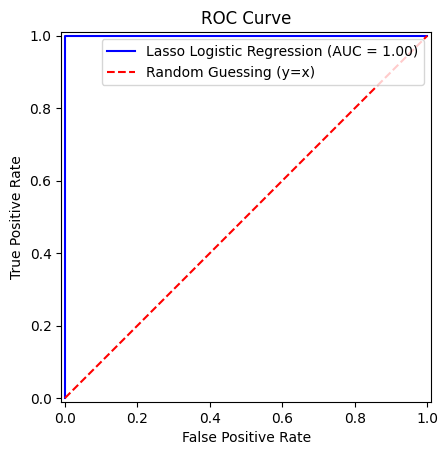

AUC score: 1.0


In [190]:
###### LASSO REGRESSION ROC CURVE

# Check the predicted probabilities for the positive class
y2_prob = lasso_lr.predict_proba(x2_test)[:, 1]

# ROC curve and AUC
roc_display = RocCurveDisplay.from_predictions(y2_test, y2_prob, name='Lasso Logistic Regression', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (y=x)')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()

# Print AUC score for confirmation
from sklearn.metrics import roc_auc_score
print("AUC score:", roc_auc_score(y_test, y_prob))

### Cross Validation

In [191]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Create a stratified cross-validator
stratified_cv = StratifiedKFold(n_splits=5)

# Perform cross-validation
cv_scores = cross_val_score(lasso_lr, x2, y2, cv=stratified_cv, scoring='accuracy')

print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores for each fold: [0.88235294 0.97058824 0.97058824 1.         0.94117647]
Mean cross-validation score: 0.9529411764705882
Standard deviation of cross-validation scores: 0.03989605872426629


### Confusion Matrix

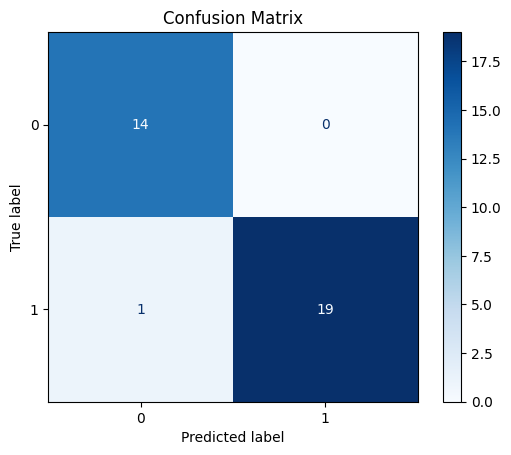

In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

###############################
# Your code starts here

y2_pred = lasso_lr.predict(x2_test) #to compare with y_test...

# Calculate the confusion matrix
cm2 = confusion_matrix(y2_test, y2_pred)

# Create a ConfusionMatrixDisplay object
cm2_display = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=lasso_lr.classes_)

# Plot the confusion matrix
cm2_display.plot(cmap=plt.cm.Blues, values_format='d')  # Use a blue color map and format values as integers
plt.title("Confusion Matrix")
plt.show()

### Coefficient Analysis for Lasso Logistic Regression




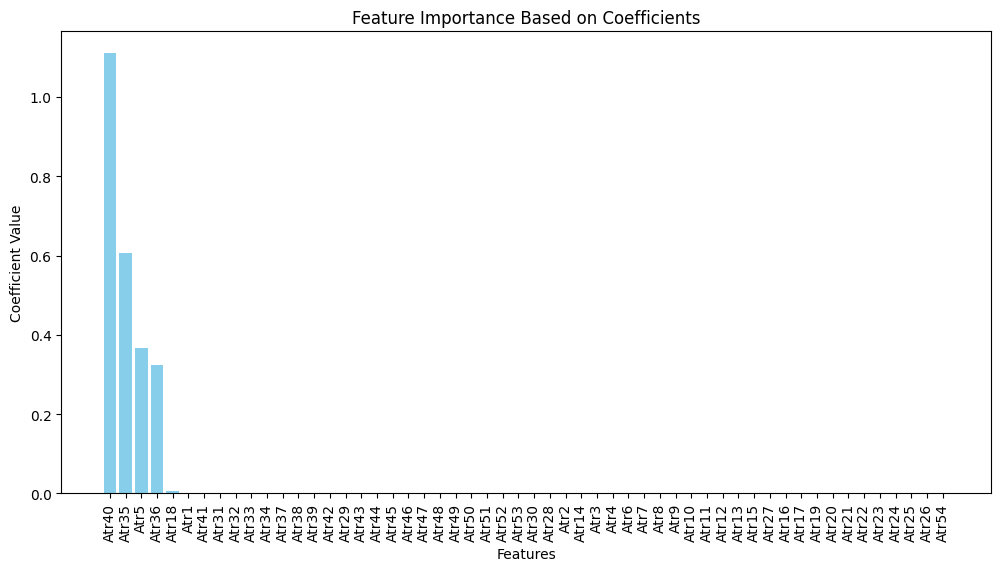

In [198]:
# Get the model coefficients
coefficients = lasso_lr.coef_[0]
features = x2_train.columns

# Create a DataFrame for plotting
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

 Out of scope for this project, but can try making random forests to see if it changes the overfitting / AUC rates.